In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
#from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
import pandas as pd 

In [2]:
true_data = pd.read_csv('True.csv')

fake_data = pd.read_csv('Fake.csv')

true_data.head()

fake_data.head()

true_data['Target']=['True']*len(true_data)
fake_data['Target']=['Fake']*len(fake_data)

data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [3]:
data.head()

,title,text,subject,date,Target
0,Clinton says her campaign talking to Sanders c...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"May 31, 2016",True
1,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION ...,You have got to be kidding me! After all the t...,Government News,"Sep 17, 2016",Fake
2,Henry Rollins DESTROYS North Carolina’s GOP G...,Bigoted North Carolina Governor Pat McCrory is...,News,"April 24, 2016",Fake
3,China speculators target 'Huning' elevator fir...,SHANGHAI (Reuters) - A little-known Chinese el...,worldnews,"October 25, 2017",True
4,Russia's Putin: ready to meet Trump any moment...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"December 13, 2016",True


([<matplotlib.patches.Wedge at 0x7fd90ee288e0>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

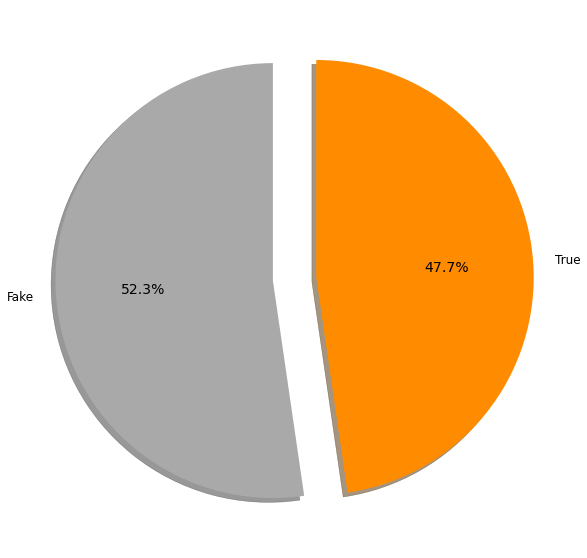

In [4]:
cat_tar=pd.get_dummies(data.Target)['Fake']
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['darkgrey','darkorange'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [11]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [12]:
data_matrix = embed(data.title.tolist())

In [17]:
train_data = data.loc[0:int(len(data)*0.8)]
test_data = data.loc[int(len(data)*0.8):len(data)]

In [18]:
pca = PCA(n_components=3)
pca_data = pca.fit(data_matrix[0:len(train_data)])
pca_train = pca.transform(data_matrix[0:len(train_data)])

In [19]:
pca_3_data = pd.DataFrame({'First Component':pca_train[:,0],'Second Component':pca_train[:,1],'Third Component':pca_train[:,2],'Target': train_data.Target})

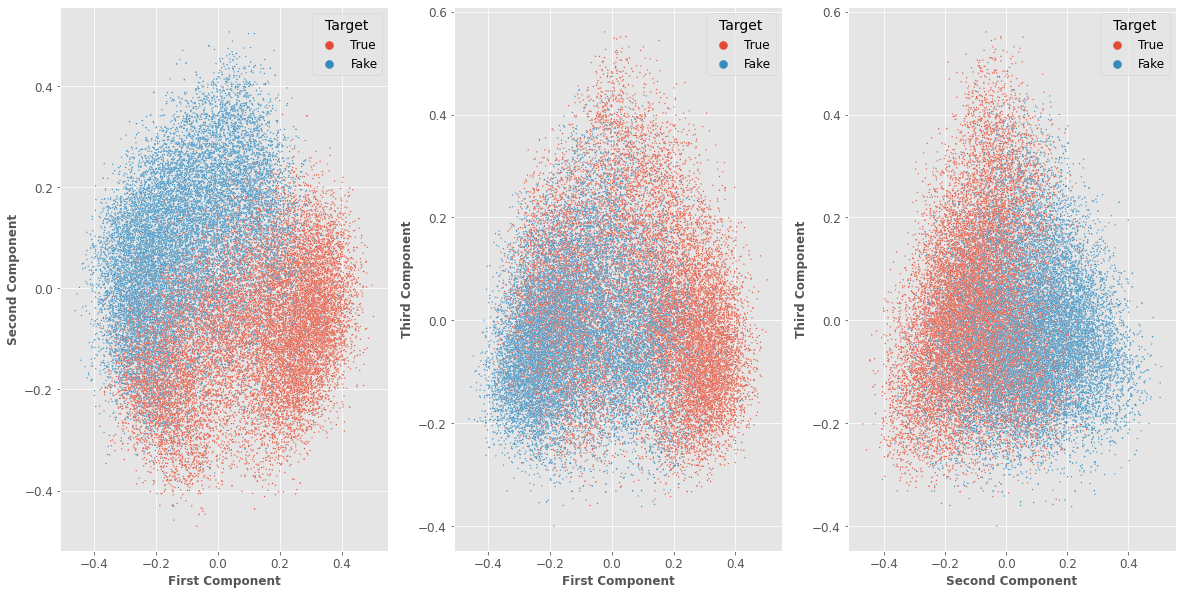

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x='First Component', y = 'Second Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,2)
sns.scatterplot(x='First Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,3)
sns.scatterplot(x='Second Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)

In [21]:
#pca_3_data['subject']=train_data.subjectenc.astype(float)

In [26]:
from pycaret.classification import * 

In [27]:
pca_3_data

,First Component,Second Component,Third Component,Target
0,-0.187378,-0.059214,0.153962,True
1,-0.070292,-0.070400,0.099693,Fake
2,0.001743,0.105284,0.292802,Fake
3,0.281100,-0.166284,-0.031724,True
4,-0.185026,-0.352597,-0.262406,True
...,...,...,...,...
35914,-0.234222,0.041828,0.102378,True
35915,-0.055667,-0.239213,-0.186558,True
35916,-0.207573,-0.133080,-0.088823,Fake
35917,0.179459,0.166114,-0.120188,Fake


In [28]:
setup(data = pca_3_data, target='Target')

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=Target, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_f

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 0.24.2. Support for newer scikit-learn versions will be added in a future release.

In [29]:
best_model = compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, display=None, exclude=None)
INFO:logs:Checking exceptions


NameError: name '_all_models' is not defined

*** 

In [26]:
test_data.head()

,title,text,subject,date,Target
35918,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",left-news,"May 10, 2017",Fake
35919,Trump Posed With Pastor Who Said Gays Work Fo...,In the days following the massacre at the Puls...,News,"June 18, 2016",Fake
35920,California lawmakers take anti-Trump stance as...,"SACRAMENTO, Calif. (Reuters) - California lawm...",politicsNews,"September 15, 2017",True
35921,Clinton Just Expertly Trolled Trump With This...,Democratic presidential candidate Hillary Clin...,News,"October 2, 2016",Fake
35922,U.S. senators seek details on 'dubious' oversi...,WASHINGTON (Reuters) - A decision by Mitsubish...,politicsNews,"November 20, 2017",True


In [27]:
pca_test = pca.transform(data_matrix[len(train_data)-1:len(train_data)+len(test_data)])

In [28]:
y_pred = best_model.predict(pca_test)

In [31]:
le = LabelEncoder()
y_true = le.fit_transform(test_data.Target)

In [32]:
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4719
           1       0.87      0.88      0.88      4261

    accuracy                           0.88      8980
   macro avg       0.88      0.88      0.88      8980
weighted avg       0.88      0.88      0.88      8980



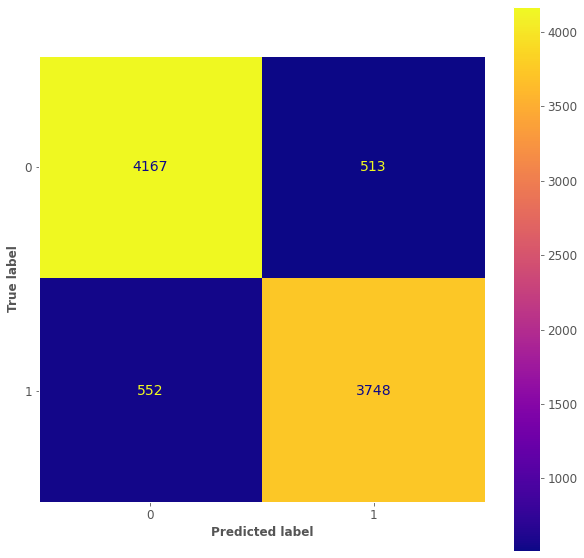

In [34]:
plot_confusion_matrix(best_model,pca_test,y_true,cmap='plasma')

In [35]:
data

,title,text,subject,date,Target
0,RUSH LIMBAUGH FURIOUS Trump Is Allowing â€œLoser...,The Trump administration had proposed $1 billi...,left-news,"Apr 26, 2017",Fake
1,OBAMA TAKES LEGALLY BINDING DRAFT TO UN SECURI...,Our current President must have staff workin...,Government News,"Jul 17, 2015",Fake
2,"Don Lemon Is Fed Up, Yanks Guest Off The Air ...",CNN host Don Lemon has had it with conservativ...,News,"February 18, 2017",Fake
3,White Man Arrested Unscathed After Pointing S...,"This week, black men died at the hands of poli...",News,"July 7, 2016",Fake
4,WATCH: Gun Nut Believes Trumpâ€™s â€˜Second Amendm...,Donald Trump s Second Amendment threat just ...,News,"August 10, 2016",Fake
...,...,...,...,...,...
44893,OOPS! Hereâ€™s Proof The Left Used â€œSchlongedâ€ W...,I m sure it just slipped the feeble minds of t...,left-news,"Dec 27, 2015",Fake
44894,House passes bill requiring EPA actions on lea...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"February 10, 2016",True
44895,AWESOME! President Trump To The Crazed Media: ...,Judge Jeanine Pirro interviewed President Trum...,politics,"May 12, 2017",Fake
44896,EU Commission says all sides should stick to I...,BRUSSELS (Reuters) - The European Commission s...,worldnews,"October 6, 2017",True


In [37]:
MONTH = []
I=[]
date_list = data.date.tolist()
for i in range(len(data)):
  try:
    MONTH.append(date_list[i].split(' ')[0])
  except:
    I.append(i)

In [39]:
print(list(set(MONTH)))

['Jan', 'February', 'March', 'November', 'September', '14-Feb-18', 'June', 'April', 'Dec', '18-Feb-18', 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/', 'Apr', 'May', 'Mar', 'Sep', 'Jun', 'Feb', 'MSNBC', '15-Feb-18', 'July', '19-Feb-18', 'August', 'Jul', 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg', '17-Feb-18', 'January', 'Nov', 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/', 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/', '16-Feb-18', 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg', 'October', 'December', 'Oct', 'Aug']


In [40]:
MONTH_NAMES = ['Sep','Jan','November','Feb','October','Apr','February','May','July','Aug','Dec','Oct','Nov','January','Jun','March','September','Jul','August','June','December','April','Mar']
VALUES = ['09','01','11','02','10','04','02','05','07','08','12','10','11','01','06','03','09','07','08','06','12','04','03']
dictionary = dict(zip(MONTH_NAMES, VALUES))
cleaned_month = []
for i in range(len(MONTH)):
  if MONTH[i] in MONTH_NAMES:
    cleaned_month.append(dictionary[MONTH[i]])
  else: 
    if len(MONTH[i].split('-'))!=1:
      cleaned_month.append(dictionary['February'])
    else:
      cleaned_month.append(dictionary['June'])

In [43]:
YEAR = []
I=[]
for i in range(len(date_list)):
  try:
    int(date_list[i].split(' ')[2])
    YEAR.append(date_list[i].split(' ')[2])
  except:
    I.append(i)
    YEAR.append('2018')

In [44]:
DAY = []
I=[]
for i in range(len(date_list)):

  element = date_list[i].split(' ')
  if len(element)!=1:
    try:
      int(element)
      DAY.append(element[1][:-1])
    except:
      DAY.append('15')
  else:
    element = date_list[i].split('-')
    try:
        number = int(element[0])
        DAY.append(str(number))
    except:
        DAY.append('15')
        I.append(i)

In [45]:
cleaned_time = []
for i in range(len(DAY)):
  date = DAY[i]+'/'+cleaned_month[i]+'/'+YEAR[i]
  cleaned_time.append(date)

In [46]:
train_data['Date']=pd.to_datetime(pd.Series(cleaned_time))

In [48]:
ord_train = train_data.sort_values(by='Date').drop(columns=['date','text','title','subject'])

In [49]:
FAKE_COUNT = []
FAKE_RECORD = []
TRUE_RECORD = []
fake_count = 0
TRUE_COUNT = []
true_count = 0
TARGET_LIST = ord_train.Target.tolist()
for t in TARGET_LIST:
  if t=='True':
    true_count+=1
    TRUE_RECORD.append(1)
    FAKE_RECORD.append(0)
  else:
    fake_count+=1
    TRUE_RECORD.append(0)
    FAKE_RECORD.append(1)
  TRUE_COUNT.append(true_count)
  FAKE_COUNT.append(fake_count)

In [50]:
def pick_date(n):
  vec = np.linspace(0,len(TRUE_COUNT)-1,n).astype(int)
  LIST = ord_train.loc[vec].Date.tolist()
  return [vec,LIST]

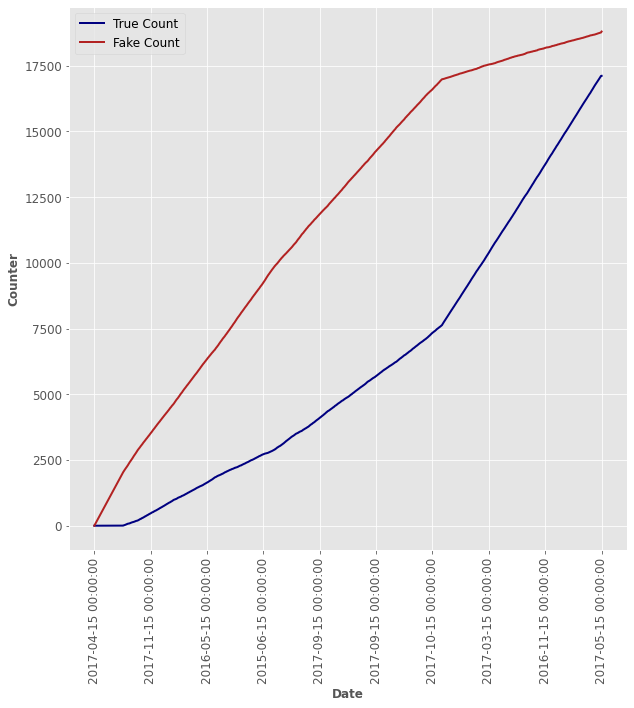

In [52]:
#plt.subplot(1,2,1)
plt.grid(True)
sns.lineplot(y=TRUE_COUNT,x=np.arange(0,len(TRUE_COUNT)),color='navy',label='True Count')
sns.lineplot(y=FAKE_COUNT,x=np.arange(0,len(TRUE_COUNT)),color='firebrick',label='Fake Count')
plt.xticks(pick_date(10)[0],pick_date(10)[1],rotation=90)
plt.xlabel('Date')
plt.ylabel('Counter')
plt.legend()


#sns.scatterplot(y=TRUE_RECORD[0:10],x=np.arange(0,10),color='navy',label='True Count')
#sns.scatterplot(FAKE_COUNT)

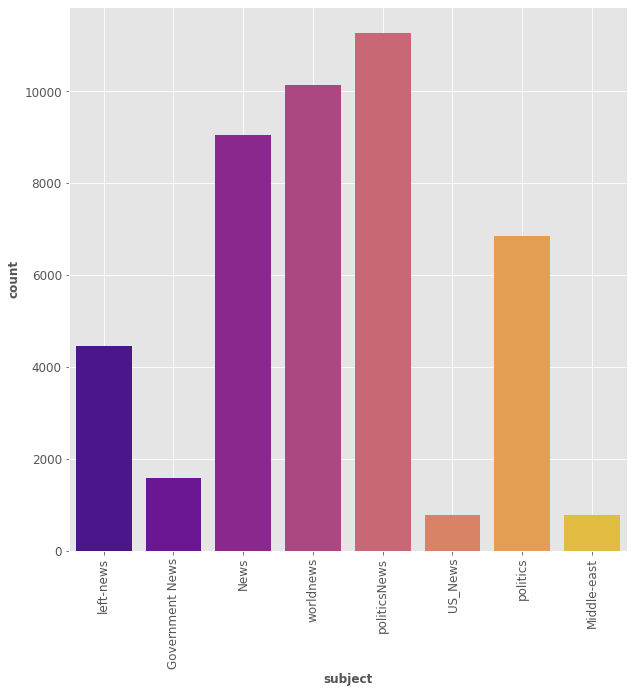

In [53]:
sns.countplot(data.subject,palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)

In [54]:
subject_data = pd.get_dummies(data.subject)

In [55]:
subject_data['Target']=pd.get_dummies(data.Target)['Fake']

In [56]:
corr_data = abs(pd.DataFrame(subject_data.corr()['Target'])).drop('Target')

In [57]:
corr_data = abs(pd.DataFrame(subject_data.corr()['Target'])).drop('Target')

Text(0, 0.5, 'Correlation')

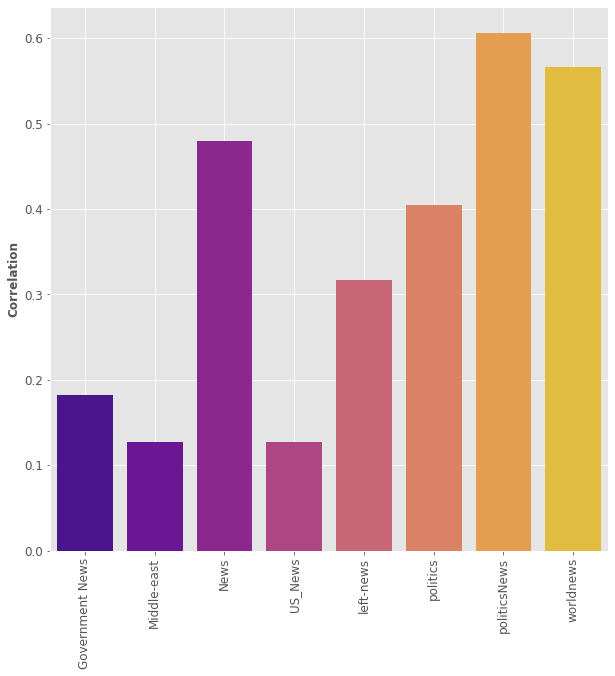

In [58]:
sns.barplot(x=corr_data.index,y=corr_data.Target,palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Correlation')

In [59]:
le = preprocessing.LabelEncoder()
data['subjectenc']=le.fit_transform(data.subject.tolist())
subject_data=pd.DataFrame(pd.get_dummies(data.Target)['Fake'])
subject_data['subjectenc']=data['subjectenc']
subject_data.corr()

,Fake,subjectenc
Fake,1.0000,-0.8162
subjectenc,-0.8162,1.0000


In [ ]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
